# Problem Set 3

In [11]:
using Distributed, SharedArrays
cd("/home/mitchv34/Work/2nd Year/ECON 899 (Computational Methods)/1st Quarter/Problem Sets/Shared Repo/Shared Repo")
include("./PS3/JuliaCode/conesa_kueger.jl");

In [14]:
using Plots, LaTeXStrings
theme(:juno) # Comment this line for final version
# theme(:wong2) # un-coment for final version
default(fontfamily="Computer Modern", framestyle=:box) # LaTex-style

## Exercise 1
Solve the dynamic programming problem of retirees and workers. Plot the value function over $a$ for a retired agent at the model-age 50 . Is it increasing and concave? Plot the savings function for a worker at the model-age $20, a_{20}^{\prime}(z, a) .$ Is saving increasing in $a ?$ Is it increasing in $z ?$

In [12]:
# Initialize the model

prim, res = Initialize();

Here we include some interesting stuff like $$\sum_{n=1}^\infty \frac{1}{n^2} = \frac{\pi^2}{6}$$

In [13]:
# Solving the value function for a predetermined values of r, w, and b
@time begin
        V_ret(prim, res)
        V_workers(prim, res)
end

# Jupyter dosen't like progress bars

  2.381606 seconds (636.92 k allocations: 342.476 MiB, 1.94% gc time, 16.95% compilation time)


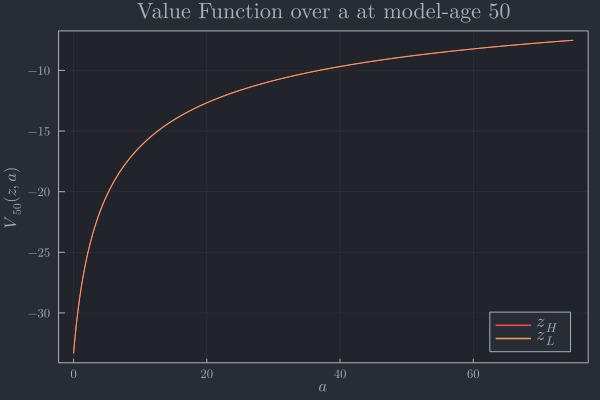

In [15]:
plot( prim.a_grid, res.val_fun[:,1,50], label = L"z_H", legend = :bottomright, legendfontsize=12)
plot!(prim.a_grid ,res.val_fun[:,2,50], label = L"z_L")
xlabel!(L"a")
ylabel!(L"V_{50}(z,a)")
title!("Value Function over a at model-age 50")

In [16]:
# Calculate savings
savings = res.pol_fun[:,:,:] .- prim.a_grid;

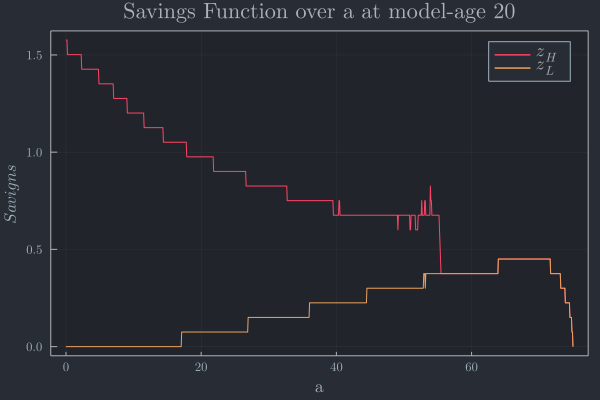

In [17]:
plot( prim.a_grid, savings[:,1,20], label = L"z_H",  legendfontsize=12)
plot!(prim.a_grid ,savings[:,2,20], label = L"z_L")
xlabel!("a")
ylabel!(L"Savigns")
title!("Savings Function over a at model-age 20")

## Exercise 2
Exercise 2
After solving for agent's dynamic programming problem, solve for the steady-state distribution of agents over age, productivity and asset holdings, $F_{j}(z, a)$. Find first the relative sizes of each cohort of age $j$ (denoted by $\mu_{j}$ ) using the expression below:
$$
\mu_{i+1}=\frac{\mu_{i}}{1+n}, \text { for } i=1, \ldots, N-1
$$

with any $\mu_{1}=\tilde{\mu}_{1}>0 .$ Then normalize $\mu$, so that it sums up to 1 across all age groups. Finally, start with the newborn generation with zero wealth: given its distribution, $F_{1}\left(z^{H}, 0\right)=\mu_{1} \times 0.2037$ and $F_{1}\left(z^{L}, 0\right)=$ $\mu_{1} \times 0.7963$, compute the distribution of agents over asset holdings at subsequent ages by applying the optimal decision rules.

Here we solve and show that we solved the question.

## Exercise 3
We have computed the decision rules and the stationary distribution for given prices. There is no guarantee that at these prices the supply of assets and labor by the agents equals the demand for capital and labor by the firms. In order to find the equilibrium prices, we use the "guess and verify" method. First, we make initial guesses on aggregate capital and aggregate labor, demanded by the firm, which we denote $K^{0}$ and $L^{0}$, respectively. They imply the interest rate $r^{0}$ and wage $w^{0}$, since markets are perfectly competitive. Observe that from the guess on $K$ and $L$ we can compute the pension benefit, $b$, using the government bud get constraint:
$$
b=\frac{\theta w^{0} L^{0}}{\sum_{j=J^{R}}^{N} \mu_{j}}
$$
Given $r^{0}$ and $w^{0}$, we compute the optimal decision rules and the stationary distribution (you have already done that!). Finally, we verify, if our guess was correct by computing the aggregate assets and labor supplied by households:
$$
K^{n e w}=\sum_{j=1}^{N} \sum_{m=1}^{n_{a}} \sum_{z \in\left\{z^{L}, z^{H}\right\}} F_{j}\left(z, a_{m}\right) a_{m} \text { and } L^{n e w}=\sum_{j=1}^{J^{R}-1} \sum_{m=1}^{n_{a}} \sum_{z \in\left\{z^{L}, z^{H}\right\}} F_{j}\left(z, a_{m}\right) e\left(z, \eta_{j}\right) l_{j}\left(z, a_{m}\right)
$$
If the guess was "far off" the obtained values, we update our initial guess with $K^{1}=0.99 K^{0}+0.01 K^{\text {new }}$ and $L^{1}=0.99 L^{0}+0.01 L^{\text {new }}$ and repeat the procedure. We proceed so until the guess and the updated values for $K$ and $L$ are "sufficiently close"

In [18]:
@time out_prim, out_res = MarketClearing(use_Fortran=false, tol = 1e-3);

1 iterations; err = 4.352273967659059, K = 5.3057, L = 0.7196, λ = 0.7
2 iterations; err = 0.41776053874646735, K = 5.1804, L = 0.6063, λ = 0.7
3 iterations; err = 0.6496105991250047, K = 4.9855, L = 0.5291, λ = 0.7
4 iterations; err = 0.6106739965762449, K = 4.8023, L = 0.4764, λ = 0.7
5 iterations; err = 0.5242179867118528, K = 4.645, L = 0.4403, λ = 0.7
6 iterations; err = 0.40863005245480544, K = 4.5224, L = 0.4156, λ = 0.7
7 iterations; err = 0.30335235711947917, K = 4.4314, L = 0.3989, λ = 0.7
8 iterations; err = 0.2206741766333753, K = 4.3652, L = 0.3874, λ = 0.7
9 iterations; err = 0.1497562499196814, K = 4.3203, L = 0.3796, λ = 0.7
10 iterations; err = 0.10677668550939678, K = 4.2882, L = 0.3743, λ = 0.7
11 iterations; err = 0.0687575867575223, K = 4.2676, L = 0.3707, λ = 0.7
12 iterations; err = 0.049407678842873004, K = 4.2528, L = 0.3682, λ = 0.7
13 iterations; err = 0.03363659246425854, K = 4.2427, L = 0.3665, λ = 0.7
14 iterations; err = 0.026249886475333106, K = 4.2348, 

Next we plot all the figures:

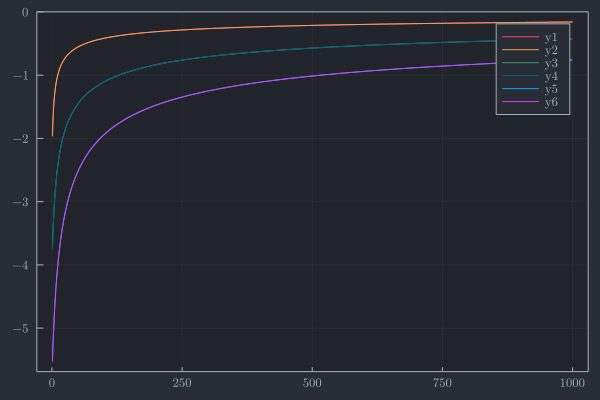

In [19]:
plot(out_res.val_fun[:,:, end])
plot!(out_res.val_fun[:,:, end-1])
plot!(out_res.val_fun[:,:, end-2])

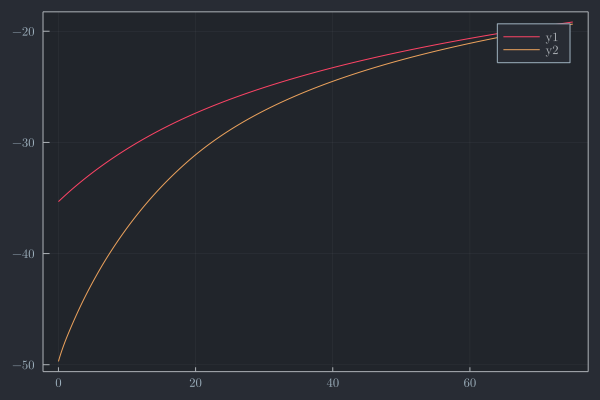

In [20]:
plot(out_prim.a_grid, out_res.val_fun[:, 1, end])
plot!(out_prim.a_grid, out_res.val_fun[:, 2, end])
plot(out_prim.a_grid, out_res.val_fun[:, 1, 20])
plot!(out_prim.a_grid, out_res.val_fun[:, 2,20])

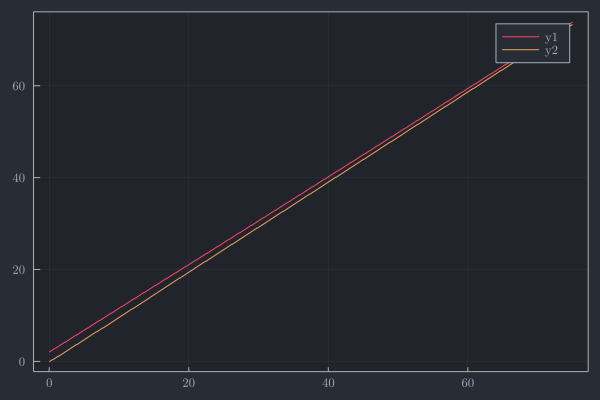

In [21]:
plot(out_prim.a_grid, out_res.pol_fun[:,1,20])
plot!(out_prim.a_grid,out_res.pol_fun[:,2,20])

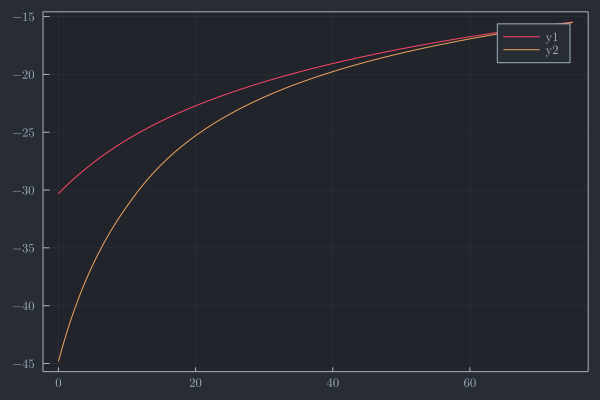

In [22]:
plot(out_prim.a_grid, out_res.val_fun[:, 1, 34])
plot!(out_prim.a_grid, out_res.val_fun[:, 2, 34])

In [23]:
# Calculate savings
savings = out_res.pol_fun[:,:,:] .- out_prim.a_grid;

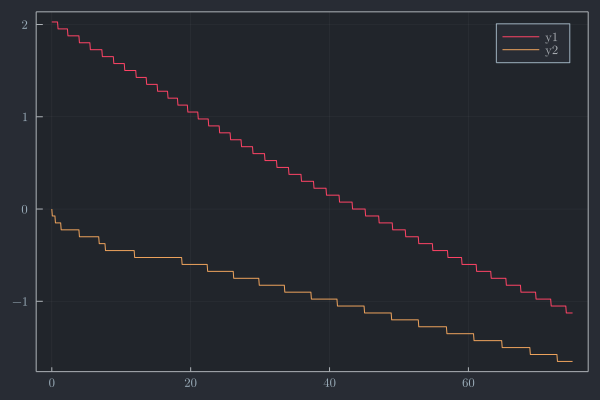

In [24]:
plot(out_prim.a_grid, savings[:,1,20])
plot!(out_prim.a_grid, savings[:,2,20])

In [25]:
#Plotting Policy Functions
    #Find a_hat (The asset point beyond which everyone dissaves)
    function Find_a_hat()
        a_hat=zeros(out_prim.nZ, out_prim.N_final)
        for zi=1:out_prim.nZ, ni=1:out_prim.N_final
            for ai=1:out_prim.nA
                if out_res.pol_fun[ai,zi,ni]<=out_prim.a_grid[ai]
                    a_hat[zi,ni]=out_prim.a_grid[ai]
                    break
                end
            end
        end
        return a_hat
    end

Find_a_hat (generic function with 1 method)

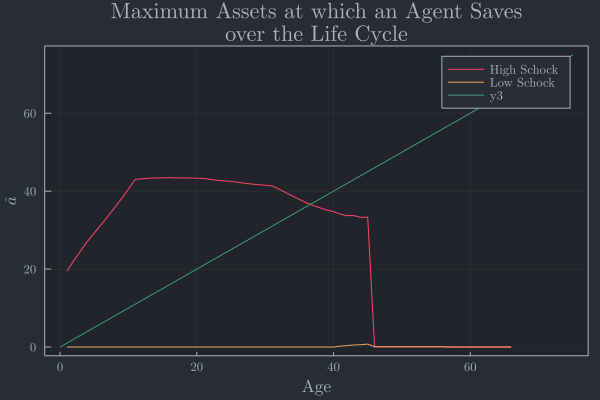

In [36]:
a_hat=Find_a_hat()
    plot(out_prim.a_grid, out_res.pol_fun[:,1,20])
    plot!(out_prim.a_grid, out_res.pol_fun[:,2,20])
    vline!([a_hat[1,20]], label=L"\hat{a}")

    plot(1:out_prim.N_final,a_hat[1,:],
        xlabel="Age", ylabel=L"\hat{a}",label="High Schock")
    plot!(1:out_prim.N_final,a_hat[2,:], title="Maximum Assets at which an Agent Saves
over the Life Cycle",
        xlabel="Age", ylabel=L"\hat{a}",label="Low Schock")

plot!(out_prim.a_grid, out_prim.a_grid)

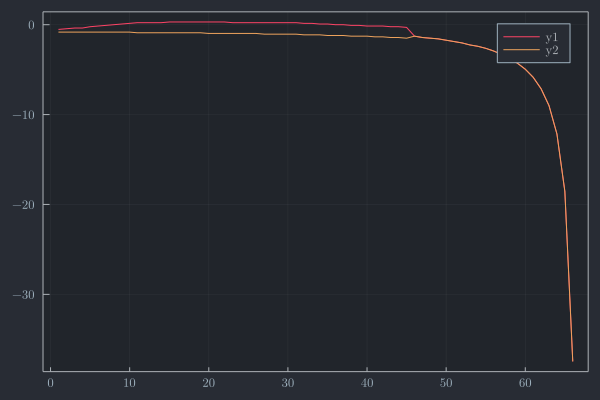

In [37]:
plot(savings[500,1,:])
plot!(savings[500,2,:])

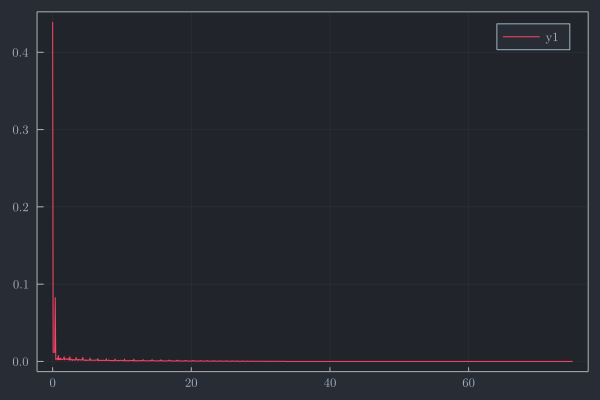

In [39]:
# accross assets for workers and retirees
a_dist = sum(out_res.F, dims = 2:3)
plot(out_prim.a_grid, a_dist[:, 1, 1])

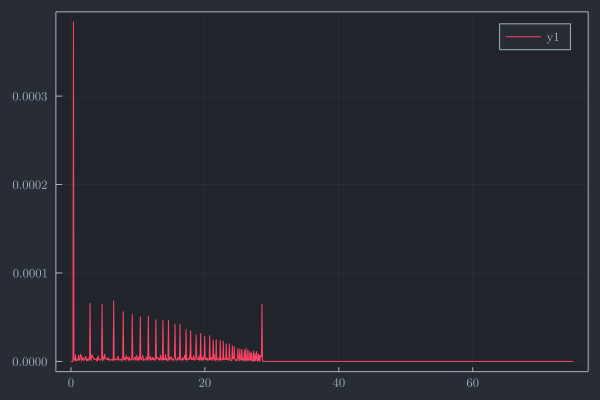

In [40]:
plot(out_prim.a_grid,out_res.F[:,1,50])

You are now asked to evaluate the macroeconomic consequences of eliminating social security.
1. First, solve for the benchmark model with social security. Is this economy dynamically efficient (compare the interest rate with the implicit return from social security, which is equal to the population growth rate)? Now eliminate social security by setting $\theta=0 .$ Observe how aggregate capital accumulation and labor supply change as a result of the tax reform. Provide intuition in terms of insurance and output efficiency. How does aggregate welfare change? Who benefits and who loses due to this reform? How does the reform affect cross-sectional wealth inequality? You can use table 1 to support your answers.
2. In the second experiment, there is no idiosyncratic risk. Assume that at each age $j, z^{L}=z^{H}=0.5$. First, compute the aggregate variables for the case with social security. How does the aggregate capital stock change relative to the benchmark model? Provide intuition in terms of capital as a buffer stock. Then, eliminate social security. How does the aggregate welfare change? What can you conclude about social security as an insurance device against idiosyncratic risk? Comment on the extent, to which these welfare comparisons across steady states are meaningful or misleading.
3. Consider the case, when labor supply is exogenous $(\gamma=1)$. Compare the distortionary effect of social security on the aggregate labor supply. How does the support for social security change with exogenous labor supply?

In [41]:
# conduct policy experiments
@time prim_noSS, res_noSS  = MarketClearing(use_Fortran=false, tol = 1e-3, ss = false);

1 iterations; err = 5.580099898018354, K = 5.674, L = 0.7211, λ = 0.7
2 iterations; err = 0.3684682726372762, K = 5.596, L = 0.6105, λ = 0.7
3 iterations; err = 0.5401578446475943, K = 5.434, L = 0.5354, λ = 0.7
4 iterations; err = 0.5795025981134385, K = 5.2601, L = 0.4842, λ = 0.7
5 iterations; err = 0.469260726824702, K = 5.1193, L = 0.4492, λ = 0.7
6 iterations; err = 0.36958185305619473, K = 5.0084, L = 0.4255, λ = 0.7
7 iterations; err = 0.2626134693420754, K = 4.9297, L = 0.4093, λ = 0.7
8 iterations; err = 0.18260137262388998, K = 4.8749, L = 0.3982, λ = 0.7
9 iterations; err = 0.12345221646625859, K = 4.8378, L = 0.3907, λ = 0.7
10 iterations; err = 0.09250892726078686, K = 4.8101, L = 0.3856, λ = 0.7
11 iterations; err = 0.06955408369980276, K = 4.7892, L = 0.3821, λ = 0.7
12 iterations; err = 0.04092417091698408, K = 4.777, L = 0.3798, λ = 0.7
13 iterations; err = 0.03036382603584542, K = 4.7678, L = 0.3782, λ = 0.7
14 iterations; err = 0.02299090926484393, K = 4.7609, L = 0

In [42]:
@time prim_noRisk, res_noRisk  = MarketClearing(use_Fortran=false, tol = 1e-3, i_risk = false);

1 iterations; err = 1.6008716874903914, K = 3.5197, L = 0.6682, λ = 0.7
2 iterations; err = 2.2075868276158515, K = 2.8575, L = 0.512, λ = 0.7
3 iterations; err = 1.5607614671926942, K = 2.3892, L = 0.4041, λ = 0.7
4 iterations; err = 1.1204927002535128, K = 2.0531, L = 0.3299, λ = 0.7
5 iterations; err = 0.7615825965343535, K = 1.8246, L = 0.2787, λ = 0.7
6 iterations; err = 0.5852954430657837, K = 1.649, L = 0.2437, λ = 0.7
7 iterations; err = 0.3652887276516028, K = 1.5394, L = 0.2195, λ = 0.7
8 iterations; err = 0.23936317905305682, K = 1.4676, L = 0.203, λ = 0.7
9 iterations; err = 0.206842109886213, K = 1.4056, L = 0.1917, λ = 0.7
10 iterations; err = 0.13159223815782117, K = 1.3661, L = 0.184, λ = 0.7
11 iterations; err = 0.0921145667104748, K = 1.3385, L = 0.1787, λ = 0.7
12 iterations; err = 0.06089864237777376, K = 1.3202, L = 0.1752, λ = 0.7
13 iterations; err = 0.0426290496644417, K = 1.3074, L = 0.1727, λ = 0.7
14 iterations; err = 0.029840334765109056, K = 1.2985, L = 0.1

LoadError: InterruptException:

The avove cell never converged.

In [ ]:
@time prim_noRisk_noSS, res_noRisk_noSS = MarketClearing(use_Fortran=false, tol = 1e-3, ss = false, i_risk = false);

1 iterations; err = 1.4074154280596076, K = 3.5778, L = 0.668, λ = 0.7
2 iterations; err = 1.7427413525889714, K = 3.055, L = 0.5115, λ = 0.7
3 iterations; err = 1.7785889239304677, K = 2.5214, L = 0.405, λ = 0.7
4 iterations; err = 1.0414188520808598, K = 2.209, L = 0.3314, λ = 0.7
5 iterations; err = 0.7823031471122919, K = 1.9743, L = 0.2811, λ = 0.7
6 iterations; err = 0.548056411825544, K = 1.8098, L = 0.2464, λ = 0.7
7 iterations; err = 0.40402005761080306, K = 1.6886, L = 0.2228, λ = 0.7
8 iterations; err = 0.27482902733458414, K = 1.6062, L = 0.2066, λ = 0.7
9 iterations; err = 0.19976477583633012, K = 1.5463, L = 0.1955, λ = 0.7
10 iterations; err = 0.15792906342400848, K = 1.4989, L = 0.1881, λ = 0.7
11 iterations; err = 0.1473743405961776, K = 1.4547, L = 0.1831, λ = 0.7
12 iterations; err = 0.05778570608955369, K = 1.4373, L = 0.1796, λ = 0.7
13 iterations; err = 0.0975639720610848, K = 1.4081, L = 0.1772, λ = 0.7
14 iterations; err = 0.011180802644362053, K = 1.4047, L = 0

In [ ]:
@time prim_exLab, res_exLab = MarketClearing(use_Fortran=false, tol = 1e-3, exog_l = true);

In [ ]:
@time prim_exLab_noSS, res_exLab_noSS  = MarketClearing(use_Fortran=false, tol = 1e-3, ss = false, exog_l = true);

And the table: 

In [ ]:
L"\begin{tabular}{|l|c|c|c|c|c|c|}\hline",
    L"&\multicolumn{2}{c}{Benchmark Model} &\multicolumn{2}{c}{No risk, $z^L$=$z^H=0.5$}",
    L"&\multicolumn{2}{c}{Exogenous labor, $\gamma=1$}\\\hline",
    L"capital, $K$ & ", out_res.K, " & ", res_noSS.K, " & ", res_noRisk.K, " & ", res_noRisk_noSS.K, " & ",
    res_exLab.K, " & ", res_exLab_noSS.K, " \\\hline",
    L"labor, $L$ & ", out_res.L, " & ", res_noSS.L, " & ", res_noRisk.L, " & ", res_noRisk_noSS.L, " & ",
    res_exLab.L, " & ", res_exLab_noSS.L, " \\\hline",
    L"wage, $w$ & ", out_res.w, " & ", res_noSS.w, " & ", res_noRisk.w, " & ", res_noRisk_noSS.w, " & ",
    res_exLab.w, " & ", res_exLab_noSS.w, " \\\hline",
    L"interest, $r$ & ", out_res.r, " & ", res_noSS.r, " & ", res_noRisk.r, " & ", res_noRisk_noSS.r, " & ",
    res_exLab.r, " & ", res_exLab_noSS.r, " \\\hline",
    L"pension benefit, $b$ & ", out_res.b, " & ", res_noSS.b, " & ", res_noRisk.b, " & ", res_noRisk_noSS.b, " & ",
    res_exLab.b, " & ", res_exLab_noSS.b, " \\\hline",
    L"total welfare, $W$ & ", sum(out_res.val_fun.*out_res.F), " & ", res_noSS.b, " & ", res_noRisk.b, " & ", res_noRisk_noSS.b, " & ",
    res_exLab.b, " & ", res_exLab_noSS.b, " \\\hline",
    L"cv(wealth) & ", Lambda(put_prim, out_res, W), " & ", Lambda(prim_noSS, res_noSS, W), " & ", Lambda(prim_noRisk, res_noRisk, W),
    " & ", Lambda(prim_noRisk_noSS, res_noRisk_noSS, W), " & ", Lambda(prim_exLab, res_exLab, W), " & ", 
    Lambda(prim_exLab_noSS, res_exLab_noSS, W), " \\\hline \end{tabular}"